## Brussels Mat. Step 2.a Construction Aggregates 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [62]:
constructions = pd.read_excel('IBSA/11.2_amenagement_territoire_parc_batiments_20170626.xlsx',
                    sheetname='11.2.5.1', skiprows = 1, #header = 0,
                    index_col = 0, skip_footer = 10)
constructions.loc[:, 'region'] = constructions.index
constructions = constructions.set_index('Année')

In [63]:
constructions.head()

Bâtiments résidentiels           Unnamed: 3             Unnamed: 4  \
Année                                                                          
NaN      Nouvelles constructions                  NaN                    NaN   
NaN          Nombre de bâtiments  Nombre de logements  Nombre d'appartements   
 1996.0                      234                 1375                   1231   
 1996.0                     3875                 4693                   1003   
 1996.0                     1324                 2546                   1319   

                                        Unnamed: 5                 Unnamed: 6  \
Année                                                                           
NaN                                            NaN                        NaN   
NaN      Nombre de bâtiments avec un seul logement  Superficie habitable (m²)   
 1996.0                                        144                     167147   
 1996.0                                       3690                     723710   
 1996.0                                       1227                     308394   

                  Unnamed: 7           Unnamed: 8 Bâtiments non résidentiels  \
Année                                                                          
NaN               Rénovation                  NaN    Nouvelles constructions   
NaN      Nombre de bâtiments  Nombre de logements        Nombre de bâtiments   
 1996.0                  960                 2264                         77   
 1996.0                 2102                 2389                        489   
 1996.0                  949                 1460                        177   

                 Unnamed: 10  Unnamed: 11          Unnamed: 12  \
Année                                                            
NaN                      NaN          NaN           Rénovation   
NaN      Nombre de logements  Volume (m³)  Nombre de bâtiments   
 1996.0                   36      1670453                  167   
 1996.0                   64      2378497                  367   
 1996.0                   24       724580                  143   

                 Unnamed: 13                        region  
Année                                                       
NaN                      NaN                           NaN  
NaN      Nombre de logements                      Colonne3  
 1996.0              117.938  Région de Bruxelles-Capitale  
 1996.0               43.015               Brabant flamand  
 1996.0                 27.3                Brabant wallon

In [56]:
def get_new_cols(iterable, keyword):
    if not isinstance(keyword, str):
        keyword = 'NaN'
    new_cols_0 = list()
    old_cols = str()
    for i in iterable:
        if not isinstance(i, str):
            i = 'NaN'
        if keyword in i or keyword == i:
            new_cols_0.append(old_cols)
        else:
            new_cols_0.append(i)
            old_cols = i
    return(new_cols_0)

In [57]:
new_cols_0 = get_new_cols(constructions.columns, 'Unnamed')
new_cols_1 = get_new_cols(constructions.iloc[0,:], np.nan)
new_cols_2 = get_new_cols(constructions.iloc[1,:], np.nan)

In [59]:
constructions.columns = [new_cols_0, new_cols_1, new_cols_2]
constructions = constructions.iloc[2:, :]
inx = constructions.region == 'Région de Bruxelles-Capitale'
constructions = constructions.loc[inx.iloc[:,0]]
constructions = constructions.iloc[:,:-1]

In [6]:
constructions = constructions.T.sort_index()

In [7]:
sqm = constructions.loc[(
    slice(None),
    #'Bâtiments résidentiels',
    slice(None),
    #slice('Nouvelles constructions'),
    [
        #'Superficie habitable (m²)',
        #'Nombre de logements', 
        'Nombre de bâtiments'
    ],
), :]

In [8]:
sqm.index = sqm.index.droplevel([-1])
sqm_per = pd.concat([
    pd.DataFrame(sqm.iloc[0].div(sqm.iloc[1] + sqm.iloc[0]).mul(100), columns=['Non Residential']),
    pd.DataFrame(sqm.iloc[2].div(sqm.iloc[3] + sqm.iloc[2]).mul(100), columns=['Residential'])], 
    axis=1)

In [9]:
g = sqm_per.plot(figsize=(10, 5))
g.set_ylabel(r'Share of new constructions $[\%]$');
g.set_title("Share of new constructed buildings of total constructed buildings");
for i in [0, 1]:
    year_max = sqm_per.index[sqm_per.iloc[:, i] == sqm_per.iloc[:, i].max()][0]
    year_min = sqm_per.index[sqm_per.iloc[:, i] == sqm_per.iloc[:, i].min()][0]
    g.text(year_max, sqm_per.iloc[:, i].max(),
           "{1:0.2f} $\%$\n{0:0.0f} (max)".format(year_max, sqm_per.iloc[:, i].max()),
           style='italic', horizontalalignment='right',
           bbox={'facecolor':'red', 'alpha':0.8, 'pad':2})
    g.text(year_min, sqm_per.iloc[:, i].min(),
           "{1:0.2f} $\%$\n{0:0.0f} (min)".format(year_min, sqm_per.iloc[:, i].min()),
           style='italic', horizontalalignment='right',
           bbox={'facecolor':'red', 'alpha':0.8, 'pad':2})
g.grid()
plt.savefig('FIGURES/btyp_share_new.png', dpi=300)

In [10]:
sqm_tot = pd.concat([
    pd.DataFrame(sqm.iloc[1] + sqm.iloc[0], columns=['Non Residential']),
    pd.DataFrame(sqm.iloc[3] + sqm.iloc[2], columns=['Residential'])], 
    axis=1)

In [11]:
sqm_tot.div(sqm_tot.iloc[0]).iloc[-1]

Non Residential    0.647541
Residential         1.74372
Name: 2013.0, dtype: object

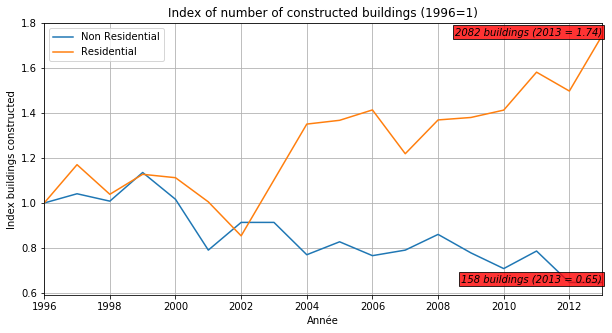

In [12]:
g = sqm_tot.div(sqm_tot.iloc[0]).plot(figsize=(10, 5))
g.set_ylabel(r'Index buildings constructed');
g.set_title("Index of number of constructed buildings (1996=1)");
for i in [0, 1]:
    g.text(2013, sqm_tot.div(sqm_tot.iloc[0]).iloc[-1, i],
           "{0:0.0f} buildings (2013 = {1:0.2f})".format(sqm_tot.iloc[-1, i],
                                               sqm_tot.div(sqm_tot.iloc[0]).iloc[-1, i]),
           style='italic', horizontalalignment='right',
           bbox={'facecolor':'red', 'alpha':0.8, 'pad':2})
g.grid()
plt.savefig('FIGURES/btyp_total_buildings.png', dpi=300)

In [13]:
sqm_du = constructions.loc[(
    'Bâtiments résidentiels',
    slice('Nouvelles constructions'),
    [
        'Superficie habitable (m²)',
        'Nombre de logements', 
    ],
), :]
sqm_du.index = sqm_du.index.droplevel([0,1])

In [14]:
sqm_du = sqm_du.iloc[1].div(sqm_du.iloc[0])
#sqm_du.name = 'sqm per DU'

In [49]:
MU_du = 74.92
MU_sd = 7.01
x = [i for i in range(2001, 2014)]
y = [MU_du + i/4 for i in range(13)]
y1 = [i+MU_sd for i in y]
y2 = [i-MU_sd for i in y]

In [53]:
g = sqm_du.plot(figsize=(10, 5), label='new DU')
g.set_ylabel('$m^2$ per dwelling unit')
g.set_xlabel('year')
g.set_title("Average dwelling unit size for new constructions (residential)")
for e, i in enumerate(sqm_du.index):
    if e in [0, 3, 6, 12, 16, 17]:
        g.text(i, sqm_du.loc[i],
               "{0:0.0f} = {1:0.2f} $m^2$".format(i, sqm_du.loc[i]),
               style='italic', horizontalalignment='right',
               bbox={'facecolor':'red', 'alpha':0.8, 'pad':2})
g.grid()
g.plot(x, y, "--", label='existing DU $\mu$')
g.fill_between(x, y1=y1, y2=y2,
               label='existing DU $\sigma$', color='green', alpha=0.3)
g.legend()
plt.savefig('FIGURES/btyp_du_size.png', dpi=300)